In [1]:
import sys
!{sys.executable} -m pip install deap


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from deap import base, creator, tools, algorithms
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import random

# Load dataset (using the JM1 dataset as an example)
data = pd.read_csv('../cm1.csv')

# Drop any missing values
data = data.dropna()

# Separate features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


# Normalize data as chi2 requires non-negative values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# 3. Use chi-square to select the top features (for example, top 10)
X_new = SelectKBest(mutual_info_classif, k=10).fit_transform(X, y)

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# 5. Train KNN
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

Accuracy:  0.88
              precision    recall  f1-score   support

       False       0.90      0.98      0.93        88
        True       0.50      0.17      0.25        12

    accuracy                           0.88       100
   macro avg       0.70      0.57      0.59       100
weighted avg       0.85      0.88      0.85       100



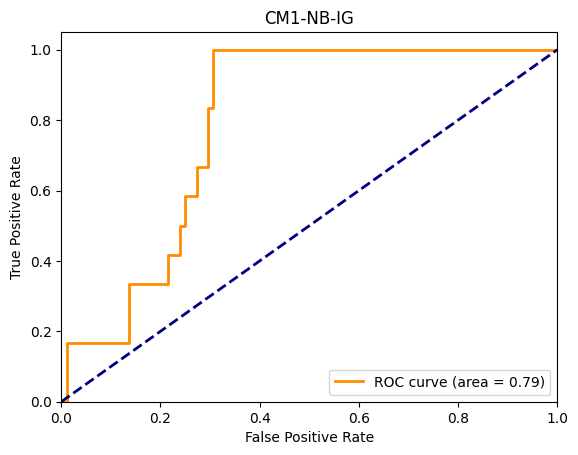

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Test the classifier
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# probabilities for the positive outcome
y_pred_proba = clf.predict_proba(X_test)[:,1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # false positive rate and true positive rate
roc_auc = roc_auc_score(y_test, y_pred_proba)

#Save AUC values
df = pd.DataFrame({
    'AUC': roc_auc,
    'FPR': fpr,
    'TPR': tpr
})
df.to_csv('./CM1_NB_IG_AUC.csv', index=False)

# Plot
plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CM1-NB-IG')
plt.legend(loc="lower right")
plt.show()